In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('House price.csv')

In [3]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [4]:
df.shape

(1379, 35)

In [5]:
df.size

48265

In [6]:
df.info

<bound method DataFrame.info of       LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1374         62.0     7917            6            5       1999          2000   
1375         85.0    13175            6            6       1978          1988   
1376         66.0     9042            7            9       1941          2006   
1377         68.0     9717            5            6       1950          1996   
1378         75.0     9937            5            6       1965          1965

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA689DDF88>]],
      dtype=object)

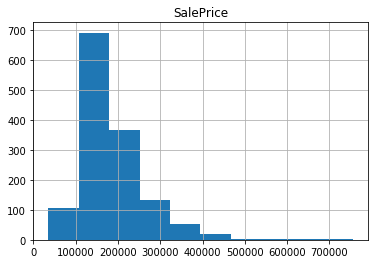

In [7]:
df.hist('SalePrice',bins=10) #or df.SalePrice.hist(bins=) or plt.hist(df.SalePrice,bins=)

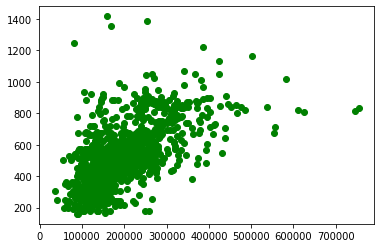

In [8]:
plt.scatter(df['SalePrice'],df['GarageArea'],color='green') #OR df.plot.scatter(x='',y='')
plt.show()

In [9]:
garage = df['GarageCars'].value_counts()

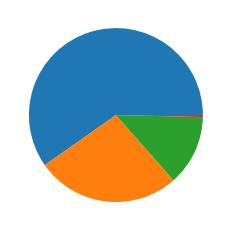

In [10]:
plt.pie(garage)
plt.show()

In [11]:
mean = df.SalePrice.mean()
print('Mean:',int(mean))
median = df.SalePrice.median()
print('Median:',int(median))
mode = df.SalePrice.mode()
print('Mode:',mode)

Mean: 185479
Median: 167500
Mode: 0    140000
dtype: int64


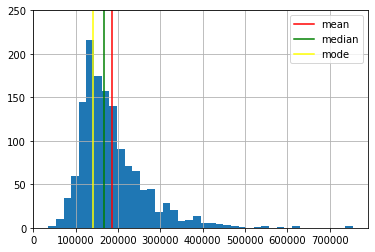

In [12]:
df.SalePrice.hist(bins=40)
plt.plot([mean]*300, range(300), label='mean', color='red')
plt.plot([median]*300, range(300), label='median', color='green')
plt.plot([mode]*300, range(300), label='mode', color='yellow')
plt.ylim(0, 250)
plt.legend()
plt.show()

In [15]:
maximum = df.SalePrice.max()
minimum = df.SalePrice.min()
range_saleprice = maximum - minimum
print(range_saleprice)

719689


In [16]:
mean = df.SalePrice.mean()
print(mean)

distance = abs(df.SalePrice - mean)
print(distance)

mad = distance.mean()/abs(len(df.SalePrice))
print('Mean average deviation:',mad)

185479.511240029
0       23020.48876
1        3979.51124
2       38020.48876
3       45479.51124
4       64520.48876
           ...     
1374    10479.51124
1375    24520.48876
1376    81020.48876
1377    43354.51124
1378    37979.51124
Name: SalePrice, Length: 1379, dtype: float64
Mean average deviation: 41.45495874245958


In [17]:
mean1 = df.SalePrice.mean()
distance1 = (abs(df.SalePrice - mean))**2

In [18]:
sd = (distance.sum()/len(df.SalePrice))**(1/2)
print('Standard deviation:',sd)

Standard deviation: 239.09493534128183


In [19]:
garage_mean = df.GarageArea.mean()
garage_std = df.GarageArea.std()

In [20]:
lot_mean = df.LotArea.mean()
lot_std = df.LotArea.std()

In [21]:
garage_cv = (garage_std/garage_mean)*100
print(garage_cv)

lot_cv =(lot_std/lot_mean)*100
print(lot_cv)

37.07958381008546
95.50188389630667


In [23]:
q1 = df.SalePrice.quantile(q=0.25)
print(q1)

q3 = df.SalePrice.quantile(q=0.75)
print(q3)

134000.0
217750.0


In [24]:
IQR = q3-q1
print('IQR:',IQR)

IQR: 83750.0


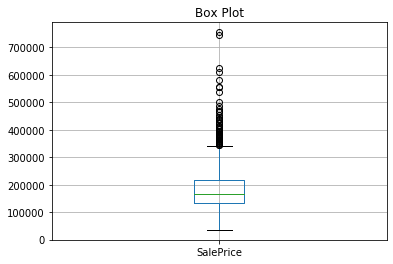

In [28]:
df.boxplot(column='SalePrice')
plt.title('Box Plot')
plt.show()

In [29]:
new = df[['LotArea','SalePrice']].iloc[0:20,:].copy()

In [30]:
mean_lotarea = new['LotArea'].mean()

In [31]:
mean_saleprice = new['SalePrice'].mean()

In [32]:
diff_lotarea = new['LotArea']-mean_lotarea

In [33]:
diff_saleprice = new['SalePrice']-mean_saleprice

In [34]:
summation = ((diff_lotarea)*(diff_saleprice)).sum()

In [37]:
covariance = summation/len(new)
print(covariance)

41420373.0


In [38]:
c = summation/(new.shape[0])
print(c)

41420373.0


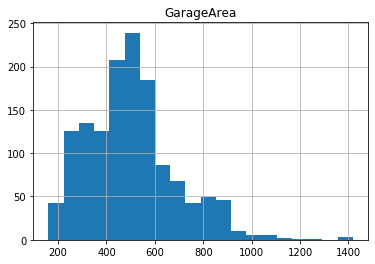

In [40]:
df.hist(column='GarageArea',bins=20)
plt.show()

In [41]:
new_df = df[['LotArea','SalePrice']].copy()

In [43]:
covariance = new_df.cov().iloc[0,1]

In [44]:
std_lotarea = new_df.LotArea.std()
std_saleprice = new_df.SalePrice.std()

In [45]:
pearson = covariance/(std_lotarea*std_saleprice)
print(pearson)

0.2529214590904537


In [46]:
ranks = new_df.rank(axis=0)

In [48]:
new_df['d^2'] = (ranks['LotArea'] - ranks['SalePrice'])**2

In [49]:
d_sq = new_df['d^2'].sum()

In [50]:
n = ranks.shape[0]
spearman = 1 - (6*d_sq)/(n*((n**2)-1))

In [51]:
print(spearman)

0.4377726002817094
